In [2]:
import pandas as pd

# Loading labels
data = pd.read_csv("NOWHERE_DATASET_copy.csv", header=[0,1], index_col=0)
data.head(20)

Name  Year GEOGRAPHY                                \
                 Name  Year    Europe Nrth America Middle East Asia   
0           CH-1995-1  1995         1            0           0    0   
1           CH-1995-3  1995         1            0           0    0   
2            E-1995-4  1995         1            0           0    0   
3            E-1995-7  1995         1            0           0    0   
4           E-1995-19  1995         1            0           0    0   
5           E-1995-23  1995         1            0           0    0   
6           E-1995-34  1995         1            0           0    0   
7            I-1995-2  1995         1            0           0    0   
8           I-1995-12  1995         1            0           0    0   
9           I-1995-19  1995         1            0           0    0   
10           E-1996-7  1996         1            0           0    0   
11           E-1996-9  1996         1            0           0    0   
12   Blue Poster_1997  1997         1            0           0    0   
13    Connection_1997  1997         1            0           0    0   
14         Decor_1997  1997         1            0           0    0   
15  Doll's House_1997  1997         1            0           0    0   
16           Eve_1997  1997         1            0           0    0   
17         Glass_1997  1997         1            0           0    0   
18    Green Wall_1997  1997         1            0           0    0   
19     NL-1997-1_1997  1997         1            0           0    0   

               REALITY                  ... CONTENT TO ME           \
   Sth America    Void Non-place Space  ...    Convention Struggle   
0            0       1       1.0   0.0  ...           0.0      0.0   
1            0       0       0.0   0.0  ...           0.5      0.0   
2            0       0       0.5   0.0  ...           0.0      0.0   
3            0       0       0.0   0.0  ...           0.0      0.0   
4            0       0       0.0   0.0  ...           0.0      0.0   
5            0       0       0.0   0.0  ...           0.0      0.0   
6            0       0       0.0   0.0  ...           0.0      0.0   
7            0       0       0.0   0.0  ...           0.0      0.0   
8            0       0       0.0   0.0  ...           0.0      0.0   
9            0       0       0.0   0.0  ...           0.0      0.0   
10           0       0       0.0   0.0  ...           0.0      0.0   
11           0       0       0.0   0.0  ...           0.0      0.0   
12           0       0       0.0   0.0  ...           0.0      0.0   
13           0       0       0.0   0.0  ...           0.0      0.0   
14           0       0       0.0   0.0  ...           0.0      0.0   
15           0       0       0.0   0.0  ...           0.0      0.0   
16           0       0       0.0   0.0  ...           0.0      0.0   
17           0       0       0.0   0.0  ...           0.0      0.0   
18           0       0       0.0   0.0  ...           0.0      0.0   
19           0       0       0.0   0.0  ...           0.0      0.0   

                                                                           \
   Interference Substitution Alienation Space & Time Pretention Addiction   
0           0.0          0.0        0.0          1.0        0.0       0.0   
1           0.0          0.0        0.0          0.0        0.3       0.0   
2           0.0          0.0        0.0          0.0        0.0       0.0   
3           0.0          0.0        0.0          0.0        0.0       0.0   
4           0.0          0.0        0.0          0.0        0.0       0.0   
5           0.0          0.0        0.0          0.0        0.0       0.0   
6           0.0          0.0        0.0          0.0        0.0       0.0   
7           0.0          0.0        0.0          0.0        0.0       0.0   
8           0.0          0.0        0.0          0.0        0.0       0.0   
9           0.0          0.0        0.0          0.0        0.0   

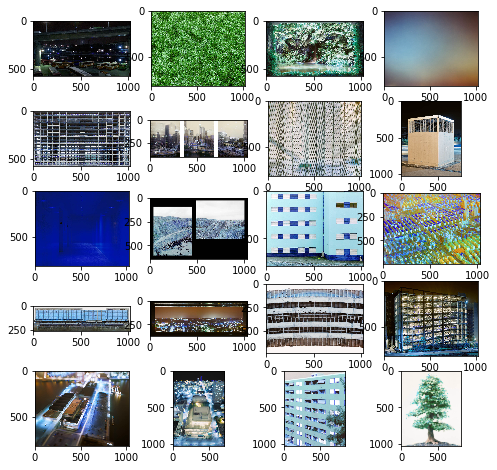

In [3]:
%matplotlib inline

import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Loading images
image_dir = './NOWHERE/230_works_1024x/pictures_copy'
images = []

for filename in os.listdir(image_dir):
    img = cv2.imread(os.path.join(image_dir,filename))
    if img is not None:
        images.append(img)

# plot some images for testing
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i])
plt.show()

In [4]:
from keras.layers import *
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50
from keras.optimizers import SGD

resnet_weights_path = './resnet50_weights_tf_dim_ordering_tf_kernels.h5'

# Reset 50 model
model = Sequential()
model.add(ResNet50(include_top = True, pooling = 'avg', weights = resnet_weights_path))
model.summary()

#Stil have to compile model (e.g. determine loss function and optimizer)
model.compile(optimizer = SGD(lr=.01, momentum=.9),
              loss ='categorical_crossentropy',
              metrics = ['accuracy'])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1000)              25636712  
Total params: 25,636,712
Trainable params: 25,583,592
Non-trainable params: 53,120
_________________________________________________________________


In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input


data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = data_generator.flow_from_directory(
    directory =  './NOWHERE/230_works_1024x',
    target_size = (224, 224),
    batch_size = 1,
    class_mode = None,
    shuffle = False)

Found 231 images belonging to 1 classes.


In [6]:
# Making predictions
predictions = model.predict_generator(test_generator,steps = len(images), verbose=1)

231/231 [==============================] - 22s 96ms/step


In [7]:
# Collecting predictions
filenames = [filename[14:] for filename in test_generator.filenames]
pred_classes = [prediction.argsort()[-50:][::-1] for prediction in predictions]
pred_probabilities = [sorted(prediction, reverse=True)[:50] for prediction in predictions]

In [14]:
# Example:
# Prediction % of the 1st image on the 999th class
predictions[1][999]

2.7486993e-07